# **CH01. Logistic Regression**

**데이터 형태**

> **1. 연속형**\
Linear Regression 사용

> **2. 비연속형 (범주형)**\
데이터 범위 0과 1에 사이에 있음\
단순 선형 회귀에 예측값의 범위는 (-)무한대~무한대\
0과 1사이 벗어나는 예측은 예측 정확도를 낮추게 됨\
예측 결과가 0과 1사이에 있어야 함


> Logistic Regression 사용\
=> Linear Regression + Logistic Regression



**Threshold란?**\
확률값을 범주형으로 변환할때 기준

- Threshold = 0.5
- 확률이 0.5보다 크면 1
- 확률이 0.5보다 작으면 0

Threshold에 따라서 정확도가 달라질 수 있음




ROC Curve

Confusion Matrix

One or Nothing
여러 범주에서 



# **CH03_02 Logistic Regression 으로 폐암의 양성 음성 분류**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

# **1. Data**

이번 실습에서 사용하는 데이터는 폐암의 양성, 음성 여부를 구분하는 문제



*1.1 Data load*

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

*데이터에 사용되는 변수들의 이름과 내용은 다음과 같습니다.

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry 
- fractal dimension ("coastline approximation" - 1)

In [3]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

**<정답>**
- malignant : 0, 양성

- benign : 1, 음성


In [4]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [5]:
data, target = cancer['data'], cancer['target']

In [6]:
data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [7]:
target[0]

0

**1.2 Data EDA**

In [8]:
df = pd.DataFrame(data, columns=cancer["feature_names"])
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
data.shape # 데이터 개수 확인

(569, 30)

In [10]:
# 양성과 음성 비율
pd.Series(target).value_counts()

1    357
0    212
dtype: int64

(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

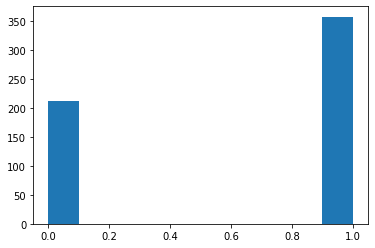

In [11]:
# Histogram으로 그리면 다음과 같음
plt.hist(target)

Text(0, 0.5, 'target')

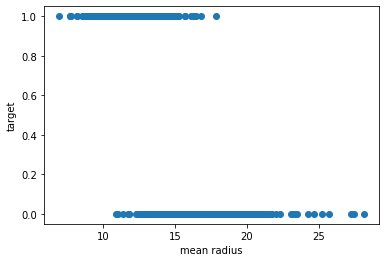

In [12]:
# mean radius와 정답간의 상관관계를 plot으로 그리면 다음과 같음
# mean radius가 클 경우 음성인 것을 확인할 수 있음
plt.scatter(x=data[:,0], y=target)
plt.xlabel('mean radius')
plt.ylabel('target')
# mean radius이 클수록 음성인 것을 확인

**1.3 data split**

In [13]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021,
)

In [14]:
print("train data 개수 : ", len(train_data))
print("train data 개수 : ", len(test_data))

train data 개수 :  398
train data 개수 :  171


# **2. Linear Regression and Categorial Label**

Logistic Regression을 학습하기에 앞서 Linear Regression으로 학습할 경우 어떻게 되는지 확인

In [15]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

2.1 학습

In [16]:
linear_regression.fit(train_data, train_target)

LinearRegression()

2.2 예측

In [17]:
train_pred = linear_regression.predict(train_data)
test_pred = linear_regression.predict(test_data)

In [18]:
train_pred[:10] #0과 1을 벗어나는 값이 있음!

array([ 0.65079698, -0.33739828,  0.76995559,  1.07473181,  0.98981797,
       -0.14066351,  0.91330917,  0.56950769,  1.12592692,  1.08459606])

**2.3 시각화**

mean.radius의 값에 변화에 따른 예측한 결과를 시각화하면 다음과 같습니다.
전체적으로 우하향하는 예측을 하는 것을 알 수 있습니다.



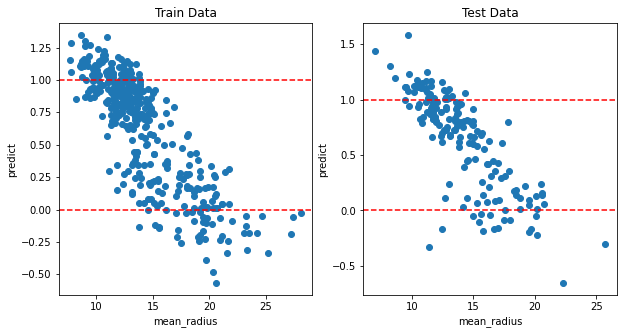

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

preds = [
    ("Train", train_data, train_pred),
    ("Test", test_data, test_pred)
]

for idx, (name, d, pred) in enumerate(preds):
  ax = axes[idx]
  ax.scatter(x=d[:,0], y=pred)
  ax.axhline(0, color='red', linestyle = '--')
  ax.axhline(1, color = 'red', linestyle = '--')
  ax.set_xlabel("mean_radius")
  ax.set_ylabel("predict")
  ax.set_title(f"{name} Data")

**2.4 평가하기**

Linear Regression의 성능을 측정하기 위해서는 우선 예측값을 0과 1로 변환시켜줘야 합니다.\
강의에서 배웠던 Youden's Index를 이용해 Best Threshold를 찾은 후 0과 1로 변화시킨 후 정확도를 보겠습니다.

In [20]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, threshold = roc_curve(train_target, train_pred)# 앞에가 정답, 뒤에가 예측값
auroc = auc(fpr, tpr)

Text(0, 0.5, 'tpr')

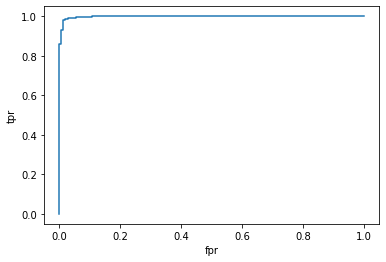

In [21]:
plt.plot(fpr, tpr)
plt.xlabel('fpr') # false positive rate
plt.ylabel('tpr') # true positive rate

In [22]:
fpr

array([0.        , 0.        , 0.        , 0.00675676, 0.00675676,
       0.01351351, 0.01351351, 0.02027027, 0.02027027, 0.02702703,
       0.02702703, 0.05405405, 0.05405405, 0.10810811, 0.10810811,
       1.        ])

In [23]:
tpr

array([0.   , 0.004, 0.86 , 0.86 , 0.928, 0.928, 0.98 , 0.98 , 0.988,
       0.988, 0.992, 0.992, 0.996, 0.996, 1.   , 1.   ])

In [24]:
threshold

array([ 2.3431729 ,  1.3431729 ,  0.74268219,  0.74137999,  0.69609319,
        0.68867913,  0.63316544,  0.62480986,  0.58612053,  0.58042965,
        0.57594808,  0.55461919,  0.53720045,  0.44439165,  0.44218128,
       -0.56296658])

In [25]:
# AUROC 값 계산
print(f"AUROC:{auroc:.4f}")

AUROC:0.9979


In [26]:
np.argmax(tpr - fpr)
# tpr - fpr = 가장 큰값

8

In [27]:
J = tpr - fpr # Youden's Index 구하는 방법은 tpr-fpr 계산해서 가장큰 값을 찾아주면됨)
idx = np.argmax(J) # 제일큰 값을 찾아줌 >> 8번째
best_thresh = threshold[idx]
print(f"Best Threshold is {best_thresh:.4f}") #직선과 AROC커브가 가장 긴 곳임
print(f"Best Threshold's sensitivity is {tpr[idx]:.4f}")
print(f"Best Threshold's specificity is is {1-fpr[idx]:.4f}")
print(f"Best Threshold's J is {J[idx]:.4f}")

Best Threshold is 0.5861
Best Threshold's sensitivity is 0.9880
Best Threshold's specificity is is 0.9797
Best Threshold's J is 0.9677


Text(0, 0.5, 'tpr')

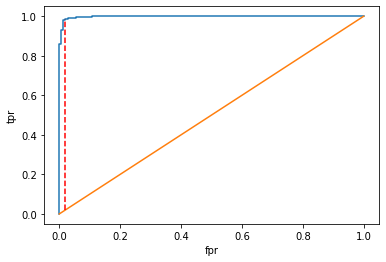

In [28]:
plt.plot(fpr, tpr)
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10))
plt.plot((fpr[idx], fpr[idx]), (fpr[idx], tpr[idx]), color="red", linestyle = '--')
plt.xlabel('fpr')
plt.ylabel('tpr')

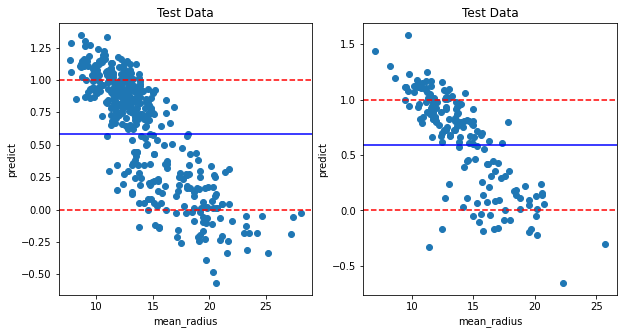

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

preds = [
    ("Train", train_data, train_pred),
    ("Test", test_data, test_pred),
]

for idx, (names, d, pred) in enumerate(preds):
  ax = axes[idx]
  ax.scatter(x=d[:,0], y=pred)
  ax.axhline(0, color="red", linestyle ="--")
  ax.axhline(1, color="red", linestyle = "--")
  ax.set_xlabel("mean_radius")
  ax.set_ylabel("predict")
  ax.set_title(f"{name} Data")
  ax.axhline(best_thresh, color = "blue")
# 파란색선 위로는 1 아래는 0으로 

이제 Threshold로 예측값을 0과 1로 변환후 정확도 확인

In [30]:
train_pred_label = list(map(int, (train_pred > best_thresh)))
test_pred_label = list(map(int, (test_pred > best_thresh)))

In [31]:
from sklearn.metrics import accuracy_score # 정확도 체크 

linear_train_accuracy = accuracy_score(train_target, train_pred_label)
linear_test_accuracy = accuracy_score(test_target, test_pred_label)

In [32]:
print(f"Train accuracy is : {linear_train_accuracy:.2f}")
print(f"Test accuracy is : {linear_test_accuracy:.2f}")

Train accuracy is : 0.98
Test accuracy is : 0.96


# **3. Logistic Regression**



**3.1 Scaling**

Logistic Regression은 학습하기에 앞서 학습시킬 데이터를 정규화 해야함\
Logistic Regression에는 exp가 있는데, exp는 값이 클 경우 overflow가 일어날 수 있기 때문임

In [33]:
from sklearn.preprocessing import StandardScaler #스탠다드 스케일러 사용하여 스케일링 진행
# 정규화 항상 할때, Train 데이터 이용하여 정규화 학습, 그다음에 테스트 데이터 변환 해야함
scaler = StandardScaler()

정규화는 항상 train data를 이용해 학습하고 valid, test 데이터를 변환해야 함\
모든 데이터를 한번에 학습할 경우 본적이 없는 valid data의 평균과 분산이 반영되고 이는 overfitting을 일으키는 원인이 됨

In [34]:
# 항상 sacler.fit은 train data로 진행(over fittin 방지!)
scaler.fit(train_data)

StandardScaler()

In [35]:
# 학습된 scaler로 train/test 데이터를 변환함

scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [36]:
train_data[0]

array([1.130e+01, 1.819e+01, 7.393e+01, 3.894e+02, 9.592e-02, 1.325e-01,
       1.548e-01, 2.854e-02, 2.054e-01, 7.669e-02, 2.428e-01, 1.642e+00,
       2.369e+00, 1.639e+01, 6.663e-03, 5.914e-02, 8.880e-02, 1.314e-02,
       1.995e-02, 8.675e-03, 1.258e+01, 2.796e+01, 8.716e+01, 4.729e+02,
       1.347e-01, 4.848e-01, 7.436e-01, 1.218e-01, 3.308e-01, 1.297e-01])

In [37]:
scaled_train_data[0]

array([-0.77241528, -0.25350148, -0.71766034, -0.72713135, -0.05609214,
        0.52832818,  0.80418063, -0.54281688,  0.8826752 ,  1.92363784,
       -0.56190665,  0.82998234, -0.22721273, -0.4934605 , -0.1485608 ,
        1.83202549,  1.75089411,  0.22238033, -0.03320069,  1.67142344,
       -0.74402208,  0.36363441, -0.58496884, -0.70201562,  0.06028267,
        1.48259627,  2.23558836,  0.09272995,  0.71316397,  2.55107451])

**3.2 학습**

이제 표준화된 데이터로 Logistic Regression을 학습해 보겠습니다.

In [38]:
from sklearn.linear_model import LogisticRegression

logit_regressor = LogisticRegression()

In [39]:
logit_regressor.fit(scaled_train_data, train_target)

LogisticRegression()

**3.3 예측**

Classfication 을 하는 모델의 경우 예측을 하는 방법은 두가지
1. predict\
해당 데이터가 어떤 class로 분류 할지 바로 알려줌
2. predict_proba\
각 class에 속할 확율을 보여줌

In [40]:
train_pred = logit_regressor.predict(scaled_train_data)
test_pred = logit_regressor.predict(scaled_test_data)

In [41]:
train_pred[:10]

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [42]:
train_pred_logit = logit_regressor.predict_proba(scaled_train_data)
test_pred_logit = logit_regressor.predict_proba(scaled_test_data)

In [43]:
train_pred_logit[:10] # 왼쪽이 0에 속할 확률, 1에 속할 확률

array([[9.77486880e-03, 9.90225131e-01],
       [9.99999999e-01, 1.10444571e-09],
       [2.00315051e-02, 9.79968495e-01],
       [1.74273407e-06, 9.99998257e-01],
       [4.94023919e-04, 9.99505976e-01],
       [9.99999933e-01, 6.70359495e-08],
       [2.92533805e-04, 9.99707466e-01],
       [8.26176477e-01, 1.73823523e-01],
       [1.33303137e-04, 9.99866697e-01],
       [5.72177528e-05, 9.99942782e-01]])

In [44]:
train_pred_logit[0] # 1에 속할 확률이 큼

array([0.00977487, 0.99022513])

# 평가

데이터의 AUROC를 계산하기 위해서는 1의 클래스로 분류될 확률 하난만 필요함\
반면 우리가 갖고 있는 예측ㄱ밧은 0과 1로 분류될 확률을 모두 표시\
그래서 1에 속할 확률만 남김

In [45]:
train_pred_logit = train_pred_logit[:,1]
test_pred_logit = test_pred_logit[:,1]

In [46]:
train_pred_logit[0]

0.9902251312004176

In [47]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, threshold = roc_curve(train_target, train_pred_logit)

Text(0, 0.5, 'tpr')

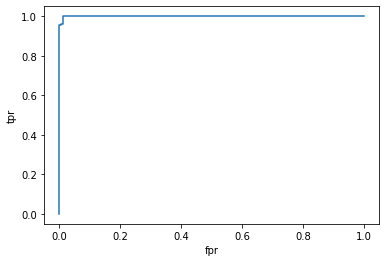

In [48]:
plt.plot(fpr, tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")

In [49]:
print("AUROC:", auc(fpr,tpr))

AUROC: 0.9994324324324324


In [50]:
J = tpr - fpr
idx = np.argmax(J)
best_thresh =  thresh = threshold[idx]

print(f"Best Threshold is {best_thresh:.4f}")
print(f"Best Threshold's sensitivity is {tpr[idx]:.4f}")
print(f"Best Threshold's specificity is {1-fpr[idx]:.4f}")
print(f"Best Threshold's J is {J[idx]:.4f}")

Best Threshold is 0.4433
Best Threshold's sensitivity is 1.0000
Best Threshold's specificity is 0.9865
Best Threshold's J is 0.9865


Text(0, 0.5, 'tpr')

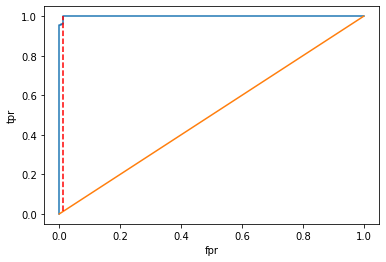

In [51]:
plt.plot(fpr, tpr)
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10))
plt.plot((fpr[idx], fpr[idx]), (fpr[idx], tpr[idx]), color = "red", linestyle = '--')
plt.xlabel("fpr")
plt.ylabel("tpr")

Text(0, 0.5, 'Probability')

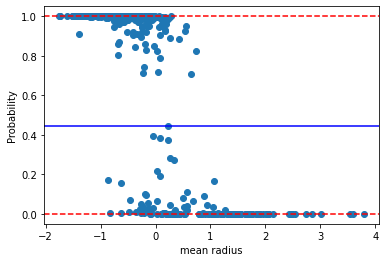

In [52]:
plt.scatter(x=scaled_train_data[:,0], y=train_pred_logit)
plt.axhline(best_thresh, color = "blue")
plt.axhline(0, color = "red", linestyle = "--")
plt.axhline(1, color = "red", linestyle = "--")
plt.xlabel("mean radius")
plt.ylabel("Probability")

Threshold로 예측값을 0,1로 변환후 정확도 확인

In [53]:
train_pred_label = list(map(int, (train_pred_logit > best_thresh)))
test_pred_label = list(map(int, (test_pred_logit > best_thresh)))

In [54]:
proba_train_accuracy = accuracy_score(train_target, train_pred_label)
proba_test_accuracy = accuracy_score(test_target, test_pred_label)

In [55]:
print(f"Train accuracy is : {proba_train_accuracy:.2f}")
print(f"Test accuracy is : {proba_test_accuracy:.2f}")

Train accuracy is : 0.99
Test accuracy is : 0.96


predict의 결과값으로 정확도를 확인

In [56]:
train_accuracy = accuracy_score(train_target, train_pred)
test_accuracy = accuracy_score(test_target, test_pred)

In [57]:
print(f"Train accuracy is: {train_accuracy:.2f}")
print(f"Test accuracy is: {test_accuracy:.2f}")

Train accuracy is: 0.99
Test accuracy is: 0.97


predict_proba의 best_threshold로 계산한 결과와 predcit로 계산한 결과가 다름\
이는 두 0과 1로 예측하는 방법이 다르기 때문임\
예를 들어서(0.49, 0.51)의 확률이 있을때 predict의 경우 class 1의 확률에 속할 확률이 크기 때문에 1로 분류함\
하지만 best_threshold가 0.52라면 predict_proba의 경우 class를 0으로 분류하게 됨

# **4. 마무리**

3개의 모델 정확도 비교

In [58]:
print(f"Linear Regression Test Accuracy: {linear_test_accuracy:.2f}")
print(f"Logistic Regression predict_proba Test Accuracy: {proba_test_accuracy:.2f}")
print(f"Logistic Regression predict Test Accuracy: {test_accuracy:.2f}")

Linear Regression Test Accuracy: 0.96
Logistic Regression predict_proba Test Accuracy: 0.96
Logistic Regression predict Test Accuracy: 0.97
